In this example, we will use GeoPandas to plot to the capital cities of the Asian countries <br>
We have been provided with a dataset that contains the latitudes and longitudes of the capital cities.

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import contextily as cx

In [2]:
#the dataset contains all the countries in the world, along with the Capital, CapitalLatitude and CapitalLongitude
df = pd.read_csv("concap.csv")
df.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [3]:
#a DataFrame containing asian countries and capital cities and their respective longitudes and latitudes.
asia = df[df["ContinentName"] == "Asia"]
asia

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
9,Afghanistan,Kabul,34.516667,69.183333,AF,Asia
24,Bahrain,Manama,26.233333,50.566667,BH,Asia
25,Bangladesh,Dhaka,23.716667,90.400000,BD,Asia
32,Bhutan,Thimphu,27.466667,89.633333,BT,Asia
38,Brunei Darussalam,Bandar Seri Begawan,4.883333,114.933333,BN,Asia
41,Myanmar,Rangoon,16.800000,96.150000,MM,Asia
43,Cambodia,Phnom Penh,11.550000,104.916667,KH,Asia
51,China,Beijing,39.916667,116.383333,CN,Asia
103,India,New Delhi,28.600000,77.200000,IN,Asia


In [4]:
#creating a GeoPandas DataFrame from a normal pandas dataFrame
#A GeoDataFrame needs a shapely object. 
#We use geopandas points_from_xy() to transform Longitude and Latitude into a list of shapely.
#Point objects and set it as a geometry while creating the GeoDataFrame. 
#(note that points_from_xy() is an enhanced wrapper for [Point(x, y) for x, y in zip(df.Longitude, df.Latitude)])
gdf = geopandas.GeoDataFrame(
    asia, geometry=geopandas.points_from_xy(asia.CapitalLongitude, asia.CapitalLatitude))

In [5]:
gdf.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName,geometry
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia,POINT (35.23333 31.76667)
9,Afghanistan,Kabul,34.516667,69.183333,AF,Asia,POINT (69.18333 34.51667)
24,Bahrain,Manama,26.233333,50.566667,BH,Asia,POINT (50.56667 26.23333)
25,Bangladesh,Dhaka,23.716667,90.400000,BD,Asia,POINT (90.40000 23.71667)
32,Bhutan,Thimphu,27.466667,89.633333,BT,Asia,POINT (89.63333 27.46667)


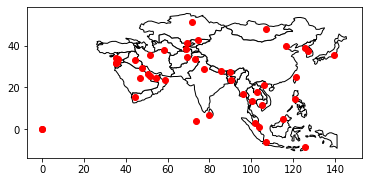

In [6]:
#Finally, we plot the coordinates over a country-level map.
asia_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Asia.
ax = asia_map[asia_map.continent == 'Asia'].plot(
    color='white', edgecolor='black' )

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()